In [68]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

pd.set_option('display.max_rows', None)

df = pd.read_csv(r'C:\Users\trevp\Desktop\Datasets\movies2.csv')
df2 = pd.read_csv(r'C:\Users\trevp\Desktop\Datasets\movies2.csv')

In [9]:
#previewing data
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [12]:
#look into missing data by column..

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}: {:.2f}%'.format( col, pct_missing))

name: 0.00%
rating: 0.01%
genre: 0.00%
year: 0.00%
released: 0.00%
score: 0.00%
votes: 0.00%
director: 0.00%
writer: 0.00%
star: 0.00%
country: 0.00%
budget: 0.28%
gross: 0.02%
company: 0.00%
runtime: 0.00%


In [19]:
# removing rows containing null values

df = df.dropna()

In [21]:
#double checking the % of missing vals by column

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}: {:.2f}%'.format( col, pct_missing))


name: 0.00%
rating: 0.00%
genre: 0.00%
year: 0.00%
released: 0.00%
score: 0.00%
votes: 0.00%
director: 0.00%
writer: 0.00%
star: 0.00%
country: 0.00%
budget: 0.00%
gross: 0.00%
company: 0.00%
runtime: 0.00%


In [24]:
#showing data types by column to see what we are dealing with

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<AxesSubplot:xlabel='gross', ylabel='budget'>

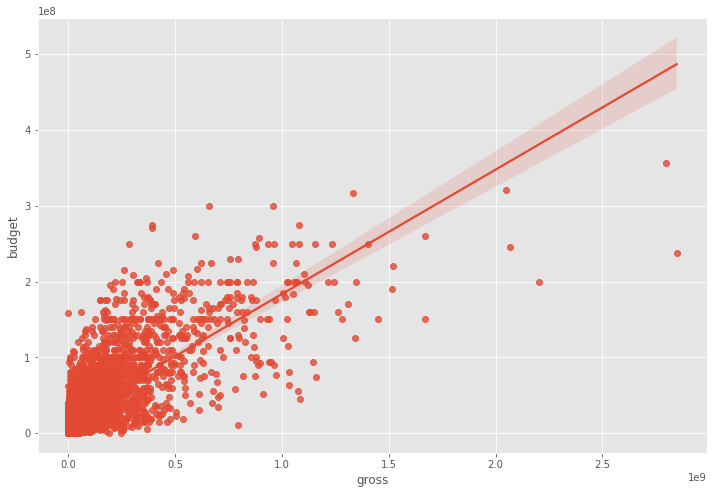

In [27]:
#checking hypothesis: gross is closely correlated to film budget. Scatter plot displays correlation.

sns.regplot(x = 'gross', y = 'budget', data = df)

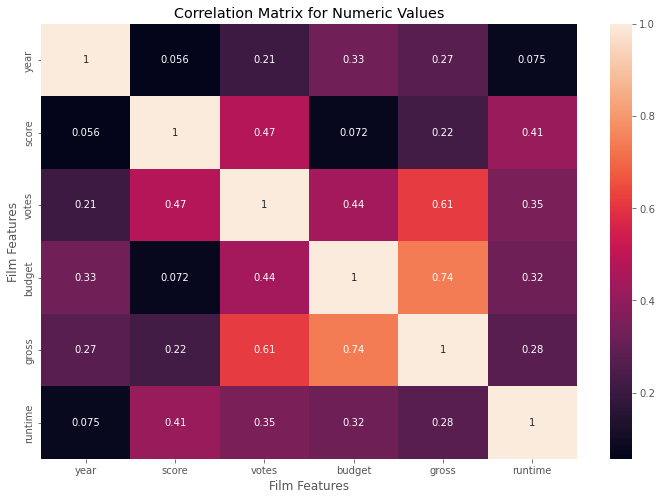

In [33]:
#heat map representation of the correlation of each numeric feature

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Values')
plt.xlabel('Film Features')
plt.ylabel('Film Features')
plt.show()


In [44]:
#giving all non-numeric columns a numeric value for the purpose of correlation comparision

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000.0,58853106.0,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000.0,538375067.0,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000.0,83453539.0,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000.0,39846344.0,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000.0,426505244.0,452,124.0
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000.0,319715683.0,1108,99.0
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000.0,245487753.0,1397,101.0
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000.0,111105497.0,12,100.0


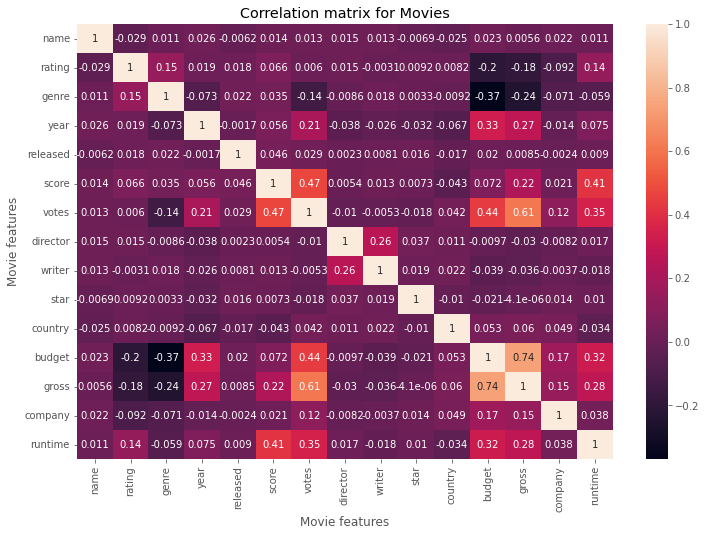

In [47]:
#matrix with non-numeric features included
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [59]:
corr_matrix = df_numerized.corr()

corr_pairs = corr_matrix.unstack()

sorted_pairs = corr_pairs.sort_values()

high_correlation = sorted_pairs[(sorted_pairs)> 0.5]

high_correlation
    

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [60]:
# Votes and Budget have highest correlation to gross earnings

<AxesSubplot:xlabel='rating', ylabel='gross'>

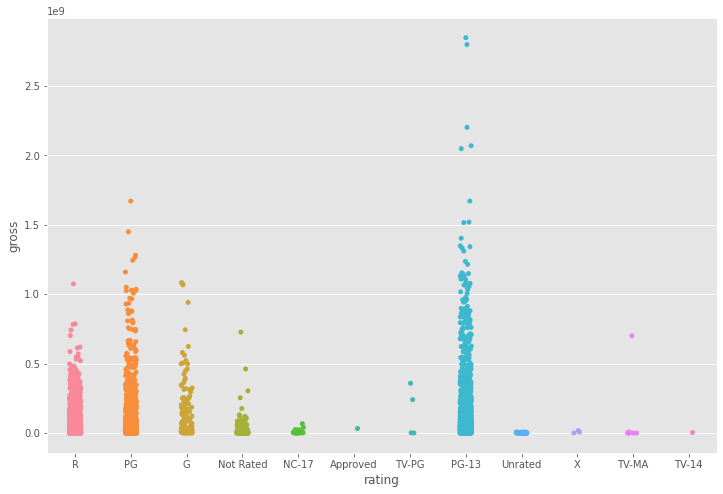

In [80]:
# quick visualization of gross earnings v film rating

sns.stripplot(x="rating", y="gross", data=df)